In [1]:
## Create report of output
import warnings
# Use this line to filter out all warnings

from python_script import make_whole_df
import pandas as pd
from mylib.lib import distribution_analytics, weighted_tt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BQ_data.csv')
df.head(3)


,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,NaN,1,1501591568,1501591568,20170801,"{\n ""totals"": {\n ""visits"": ""1"",\n ""hit...","{\n ""trafficSource"": {\n ""referralPath"": n...","{\n ""device"": {\n ""browser"": ""Chrome"",\n ...","{\n ""geoNetwork"": {\n ""continent"": ""Europe...","{\n ""customDimensions"": []\n}","{\n ""hits"": [{\n ""hitNumber"": ""1"",\n ""t...",3418334011779872055,NaN,NaN,Organic Search,Not Socially Engaged
1,NaN,2,1501589647,1501589647,20170801,"{\n ""totals"": {\n ""visits"": ""1"",\n ""hit...","{\n ""trafficSource"": {\n ""referralPath"": ""...","{\n ""device"": {\n ""browser"": ""Chrome"",\n ...","{\n ""geoNetwork"": {\n ""continent"": ""Asia"",...","{\n ""customDimensions"": [{\n ""index"": ""4"",...","{\n ""hits"": [{\n ""hitNumber"": ""1"",\n ""t...",2474397855041322408,NaN,NaN,Referral,Not Socially Engaged
2,NaN,1,1501616621,1501616621,20170801,"{\n ""totals"": {\n ""visits"": ""1"",\n ""hit...","{\n ""trafficSource"": {\n ""referralPath"": ""...","{\n ""device"": {\n ""browser"": ""Chrome"",\n ...","{\n ""geoNetwork"": {\n ""continent"": ""Europe...","{\n ""customDimensions"": [{\n ""index"": ""4"",...","{\n ""hits"": [{\n ""hitNumber"": ""1"",\n ""t...",5870462820713110108,NaN,NaN,Referral,Not Socially Engaged


In [3]:
df  = make_whole_df(df)
df.head(3)

,visitId,visitStartTime,date,totals,device,channelGrouping,fullVisitorId,visits,hits,pageviews,...,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,javaEnabled,language,screenColors,screenResolution,deviceCategory
0,1501591568,1501591568,20170801,"{\n ""totals"": {\n ""visits"": ""1"",\n ""hit...","{\n ""device"": {\n ""browser"": ""Chrome"",\n ...",Organic Search,3418334011779872055,1,1,1,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,None,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,1501589647,1501589647,20170801,"{\n ""totals"": {\n ""visits"": ""1"",\n ""hit...","{\n ""device"": {\n ""browser"": ""Chrome"",\n ...",Referral,2474397855041322408,1,1,1,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,None,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,1501616621,1501616621,20170801,"{\n ""totals"": {\n ""visits"": ""1"",\n ""hit...","{\n ""device"": {\n ""browser"": ""Chrome"",\n ...",Referral,5870462820713110108,1,1,1,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,None,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop


# Google Analytics transaction Analysis

In [4]:
df = pd.read_excel('Analytics 1 Master View Sales Performance 20230501-20230630.xlsx',sheet_name='Dataset1')
df = df.iloc[:-1,:]

In [5]:
# first we will 
df.shape

(991, 7)

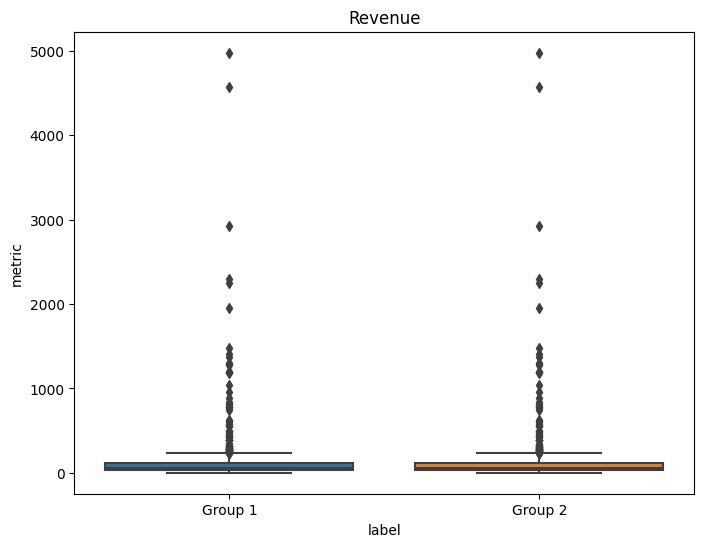

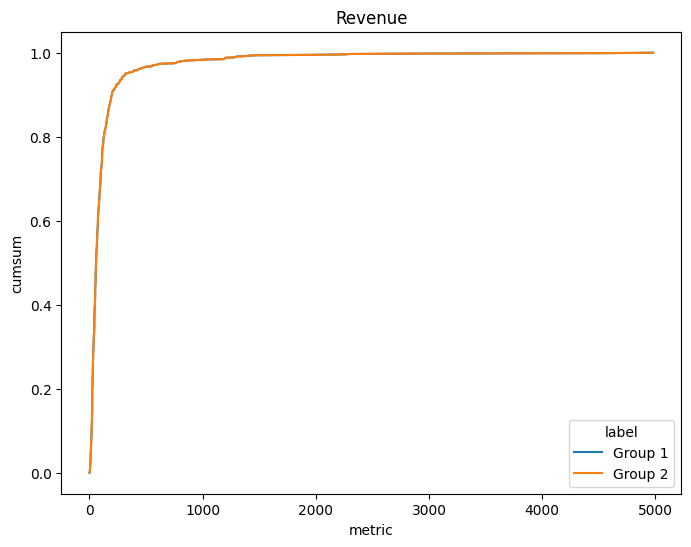

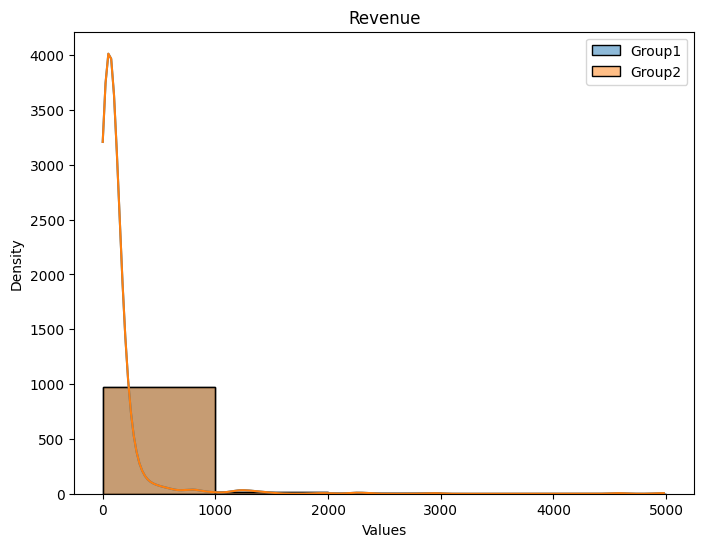

T test results
0.0 %uplift of the average from group1
Ttest_indResult(statistic=0.0, pvalue=1.0)
0.0 % confidence

Mann whitney results
Uplift of the median value from group1 to group2: 0.0 %
MannwhitneyuResult(statistic=491040.5, pvalue=1.0)
0.0 % confidence
123.99074672048438 Group 1 Average
123.99074672048438 Group 2 Average
59.2 Group 1 Median
59.2 Group 2 Median


In [6]:
# checking for the same distribution
distribution_analytics(df['Revenue'],df['Revenue'],types='r')

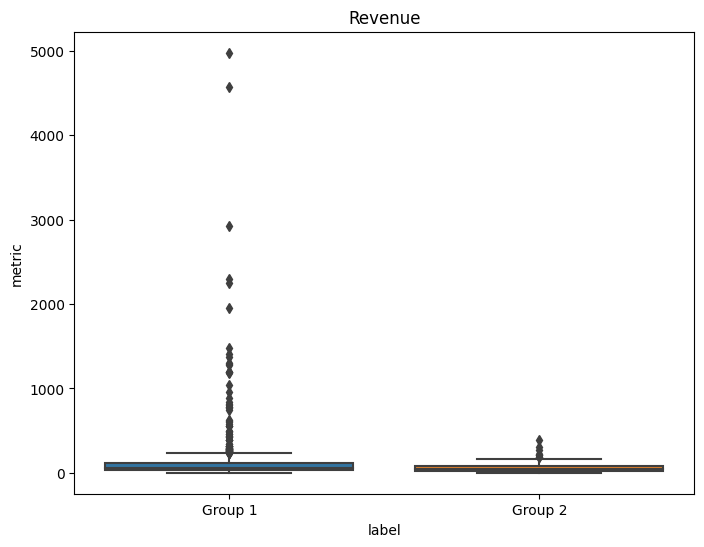

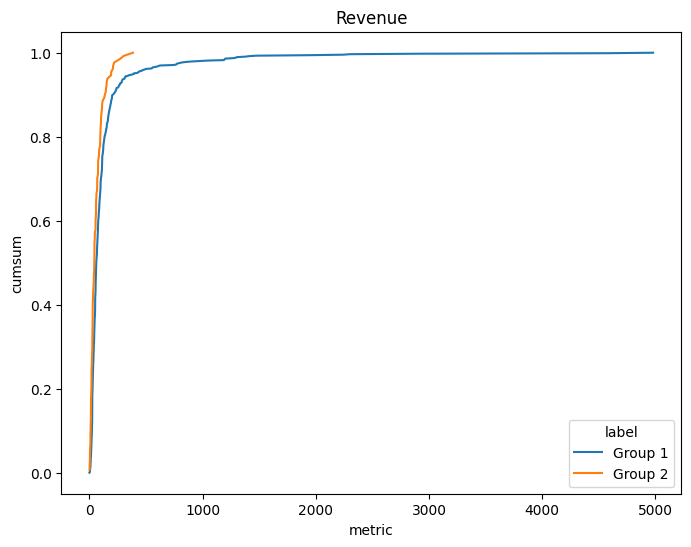

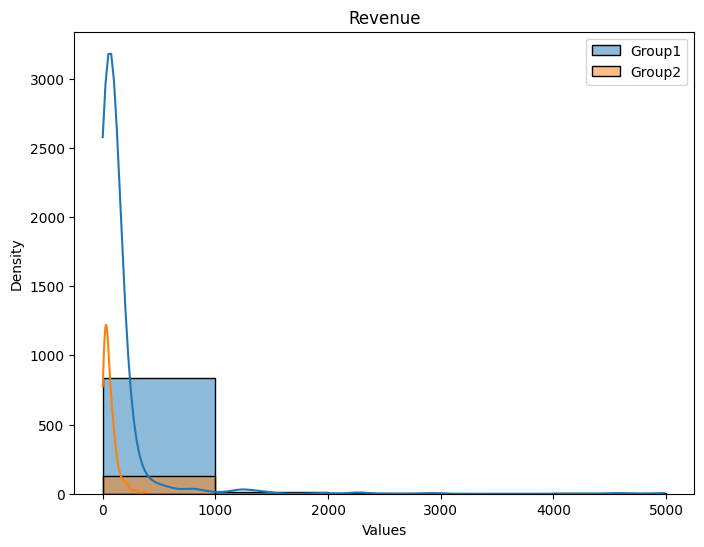

T test results
-52.98452274822035 %uplift of the average from group1
Ttest_indResult(statistic=5.726049725098042, pvalue=1.3768905022676942e-08)
99.9999986231095 % confidence

Mann whitney results
Uplift of the median value from group1 to group2: -28.571428571428577 %
MannwhitneyuResult(statistic=70173.5, pvalue=3.4409205360064518e-06)
99.99965590794639 % confidence
133.65096962616823 Group 1 Average
62.83664122137405 Group 2 Average
61.6 Group 1 Median
44.0 Group 2 Median


In [7]:
# comparing distibutions by device
desktop = df['Revenue'][df['Device Category']=='desktop']
mobile = df['Revenue'][df['Device Category']=='mobile']
distribution_analytics(desktop,mobile,types='r')

In [8]:
df.groupby('Device Category').describe().transpose()

Device Category             desktop         mobile         tablet
Transaction ID count     856.000000     131.000000       4.000000
               mean   501721.568925  501348.389313  504800.250000
               std      3605.529235    2887.352782    6179.404630
               min    496716.000000  496693.000000  499124.000000
               25%    498780.250000  499165.000000  500822.000000
               50%    501765.000000  500955.000000  503449.500000
               75%    504019.750000  503232.000000  507427.750000
               max    525669.000000  512791.000000  513178.000000
Revenue        count     856.000000     131.000000       4.000000
               mean      133.650970      62.836641      59.500000
               std       324.947116      62.260199      68.558977
               min         1.200000       1.500000      20.000000
               25%        33.400000      21.500000      22.250000
               50%        61.600000      44.000000      28.000000
               75%       114.400000      83.000000      65.250000
               max      4979.000000     385.500000     162.000000
Tax            count     856.000000     131.000000       4.000000
               mean       11.565911       4.852672       7.077500
               std        29.614368       4.776921      10.423388
               min         0.000000       0.000000       0.000000
               25%         2.900000       1.800000       1.417500
               50%         5.305000       3.470000       2.890000
               75%         9.895000       6.625000       8.550000
               max       473.860000      27.000000      22.530000
Shipping       count     856.000000     131.000000       4.000000
               mean       10.954030      10.789389       9.210000
               std         9.027008      14.390828       1.420000
               min         0.000000       8.500000       8.500000
               25%         8.500000       8.500000       8.500000
               50%         8.500000       8.500000       8.500000
               75%        11.340000       8.500000       9.210000
               max       146.610000     166.440000      11.340000
Refund Amount  count     856.000000     131.000000       4.000000
               mean        0.000000       0.000000       0.000000
               std         0.000000       0.000000       0.000000
               min         0.000000       0.000000       0.000000
               25%         0.000000       0.000000       0.000000
               50%         0.000000       0.000000       0.000000
               75%         0.000000       0.000000       0.000000
               max         0.000000       0.000000       0.000000
Quantity       count     856.000000     131.000000       4.000000
               mean        9.733645       3.847328       4.500000
               std        31.721841       4.833335       4.509250
               min         1.000000       1.000000       1.000000
               25%         1.750000       2.000000       1.750000
               50%         3.000000       2.000000       3.000000
               75%         6.000000       4.000000       5.750000
               max       510.000000      44.000000      11.000000

In [9]:
weighted_tt(desktop,mobile)

T-statistic: 2.486272732207849
Degrees of freedom: 346269559.2230064
P-value: 0.012908899727353429
The difference between the groups is statistically significant.


In [10]:
def run_device_analytics(df): 
    'wrap up function to get all at once'
    #identify segments 
    mobile = df['Revenue'][df['Device Category']== 'mobile']
    desktop = df['Revenue'][df['Device Category']== 'desktop']
    # k = distribution_analytics(mobile, desktop, 'r')
    # j = weighted_tt(mobile, desktop)
    ### some comparative stats 
    mean_diff = mobile.mean() - desktop.mean()
    return mean_diff

